# Imports

In [648]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Globals & Functions

In [649]:
def checkData(x):
    print(f"\nInfo dos valores:\n")
    print(x.info())
    print(f"\nDescrição dos dados:\n\n{x.describe()}")
    return

def checkNaN(x):
    """This function receives a DataFrame and returns the count of NaN values for each column."""
    null_count = x.isna().sum()
    non_null_count = x.notnull().sum()
    print(f"Null values:\n {null_count}")
    print(f"Non-null values:\n {non_null_count}")
    return

def checkOutliers(x):
    """This functions receives a DataFrame and returns a DataFrame with the outliers.
    It takes as premise that the data is normally distributed."""
    dfOutliers  = pd.DataFrame()
    # Itera sobre as colunas númericas
    for column in x.select_dtypes(include=[np.number]).columns:
        # Calcula o 1 quartil (Q1)
        Q1 = x[column].quantile(0.25)
        # Calcula o 3 quartil (Q3)
        Q3 = x[column].quantile(0.75)
        # Calcula o Intervalo Interquartil (IQR)
        IQR = Q3 - Q1
        # Define os limites inferior e superior para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identica os outliers da coluna atual e adiciona ao DataFrame de outliers
        outliers = x[(x[column] < lower_bound) | (x[column] > upper_bound)]
        # Concatene os outliers da coluna atual ao DataFrame de outliers
        dfOutliers = pd.concat([dfOutliers, outliers])
    outliersData = dfOutliers.drop_duplicates().reset_index(drop=True)
    return outliersData

def corr(x):
    plt.figure(figsize=(10,8))
    sns.heatmap(x.select_dtypes(include=[np.number]).corr(), annot=True)
    plt.show()
    return

def hist(x):
    """This function receives a DataFrame and returns a histogram of the data."""
    x.hist(bins=50, figsize=(25,10))
    plt.show()
    return




# Data Loading & Check

In [650]:
df_raw = pd.read_csv("train.csv")

In [651]:
checkData(df_raw)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4467 non-null   object 
 1   Delivery_person_ID           4467 non-null   object 
 2   Delivery_person_Age          4467 non-null   object 
 3   Delivery_person_Ratings      4467 non-null   object 
 4   Restaurant_latitude          4467 non-null   float64
 5   Restaurant_longitude         4467 non-null   float64
 6   Delivery_location_latitude   4467 non-null   float64
 7   Delivery_location_longitude  4467 non-null   float64
 8   Order_Date                   4467 non-null   object 
 9   Time_Orderd                  4467 non-null   object 
 10  Time_Order_picked            4467 non-null   object 
 11  Weatherconditions            4467 non-null   object 
 12  Road_traffic_density         4467 non-null   object 
 13

In [652]:
df_raw.sample(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
2479,0x441b,INDORES09DEL01,39,4.2,22.725835,75.887648,22.835835,75.997648,31-03-2022,20:45:00,21:00:00,conditions Fog,Jam,2,Snack,scooter,3,No,Metropolitian,(min) 44
3948,0x4eaf,HYDRES02DEL01,23,4.9,17.412330,78.449654,17.482330,78.519654,06-04-2022,21:00:00,21:05:00,conditions Fog,Jam,2,Drinks,scooter,1,No,Metropolitian,(min) 31
3531,0x6306,INDORES20DEL03,37,4,22.732225,75.874765,22.762225,75.904765,15-03-2022,23:40:00,23:50:00,conditions Stormy,Low,0,Drinks,motorcycle,1,No,Metropolitian,(min) 32
1197,0xea8,COIMBRES18DEL02,20,4.8,11.020910,76.940432,11.100910,77.020432,27-03-2022,20:15:00,20:25:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 38
124,0xe264,KNPRES17DEL02,22,4.5,26.483042,80.317833,26.533042,80.367833,15-02-2022,22:20:00,22:35:00,conditions Sandstorms,Low,1,Drinks,scooter,1,No,Metropolitian,(min) 18
3756,0x7b66,JAPRES12DEL02,32,4.3,26.902908,75.792934,26.922908,75.812934,05-03-2022,11:40:00,11:50:00,conditions Sandstorms,High,1,Snack,motorcycle,0,No,Urban,(min) 32
1844,0xb608,SURRES02DEL01,28,4.6,21.186608,72.794136,21.196608,72.804136,26-03-2022,10:25:00,10:40:00,conditions Windy,Low,2,Snack,scooter,0,No,Urban,(min) 16
1229,0x6624,SURRES15DEL01,25,4.7,21.160522,72.771477,21.230522,72.841477,06-04-2022,19:20:00,19:25:00,conditions Sunny,Jam,1,Buffet,scooter,0,No,Urban,(min) 19
827,0x353d,MUMRES13DEL02,27,4.2,19.178321,72.834715,19.228321,72.884715,05-03-2022,23:30:00,23:45:00,conditions Sandstorms,Low,0,Meal,motorcycle,1,No,Urban,(min) 18
707,0xb01d,MUMRES11DEL01,32,4.8,18.994237,72.825553,19.004237,72.835553,03-04-2022,08:55:00,09:00:00,conditions Fog,Low,2,Drinks,scooter,1,No,Metropolitian,(min) 18


# Clear & Transform

Clearly some columns have NaN values, but they are not appearing on the NaNs check. It can be because they are object types or are stored as string and have some weird formatting like " NaN", with a blank space.<br>First steps will be: drop excess of NaNs and remove all spaces from string columns, then convert them to the appropiate type and fill with the most appropriate value.

## Strip spaces, fix typos and types

In [653]:
df_clear = df_raw.copy()
# Remove blank spaces from strings.
df_clear = df_clear.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Convert to numeric types where needed.
df_clear["Delivery_person_Age"] = df_clear["Delivery_person_Age"].apply(pd.to_numeric, errors="coerce").astype("Int64")
df_clear["Delivery_person_Ratings"] = df_clear["Delivery_person_Ratings"].apply(pd.to_numeric, errors="coerce")
df_clear["multiple_deliveries"] = df_clear["multiple_deliveries"].apply(pd.to_numeric, errors="coerce").astype("Int64")
# Fix typo on column name
df_clear.rename(columns={"Time_Orderd": "Time_Ordered"}, inplace=True)
# Fix typo on column value
df_clear["City"] = df_clear["City"].str.replace("Metropolitian", "Metropolitan", regex=False)
# Convert dates and times to datetime objects, than to string to better work with it later.
df_clear["Order_Date"] = pd.to_datetime(df_clear["Order_Date"], format="%d-%m-%Y").astype("string")
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Time_Ordered"], format="%H:%M:%S").dt.time.astype("string")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear["Time_Order_picked"], format="%H:%M:%S").dt.time.astype("string")
# Remove letters from the Column "Time_taken(min)" and change it to Int64
df_clear["Time_taken(min)"] = df_clear["Time_taken(min)"].str.extract(r'(\d+)').astype("Int64")
# Remove excess of words on "Weatherconditions"
df_clear["Weatherconditions"] = df_clear["Weatherconditions"].str.replace("conditions ", "", regex=False)
# Change NaNs to "Unknown" on "Weatherconditions" and "Road_traffic_density", since they are not a numerical value
df_clear["Weatherconditions"] = df_clear["Weatherconditions"].str.replace("NaN", "Unknown", regex=False)
df_clear["Road_traffic_density"] = df_clear["Road_traffic_density"].str.replace("NaN", "Unknown", regex=False)
df_clear["City"] = df_clear["City"].str.replace("NaN", "Unknown", regex=False)
df_clear["Festival"] = df_clear["Festival"].str.replace("NaN", "Unknown", regex=False)


In [654]:
print(f"Max rating: {df_clear["Delivery_person_Ratings"].max()}\nMin rating: {df_clear["Delivery_person_Ratings"].min()}")
df_clear[df_clear["Delivery_person_Ratings"] > 5.0]

Max rating: 6.0
Min rating: 1.0


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
3586,0x46d,BANGRES05DEL01,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,<NA>,12:30:00,Unknown,Unknown,3,Meal,electric_scooter,0,No,Urban,25


There's one rating value of 6.0. Since theres just one "wrong" value, and assuming that the max is 5 "stars", it will be fixed to 5.0.

In [655]:
df_clear.loc[df_clear["Delivery_person_Ratings"] > 5.0, "Delivery_person_Ratings"] = 5.0

## Drop excess of NaNs

In [656]:
# To keep it simple, rows with more than 2 NaNs will be dropped
df_clear = df_clear.dropna(thresh=len(df_clear.columns) - 2).reset_index(drop=True)
# Theres only 1 NaN on "Time_taken(min)", and since it will be lot of work to estipulate, it will be dropped
df_clear = df_clear.dropna(subset=["Time_taken(min)"]).reset_index(drop=True)

In [657]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4291 non-null   object 
 1   Delivery_person_ID           4291 non-null   object 
 2   Delivery_person_Age          4277 non-null   Int64  
 3   Delivery_person_Ratings      4271 non-null   float64
 4   Restaurant_latitude          4291 non-null   float64
 5   Restaurant_longitude         4291 non-null   float64
 6   Delivery_location_latitude   4291 non-null   float64
 7   Delivery_location_longitude  4291 non-null   float64
 8   Order_Date                   4291 non-null   string 
 9   Time_Ordered                 4287 non-null   string 
 10  Time_Order_picked            4291 non-null   string 
 11  Weatherconditions            4291 non-null   object 
 12  Road_traffic_density         4291 non-null   object 
 13

## Merge coordinates as touple in a new column

To better work with coordinates, they will be stored as a touple.


In [658]:
df_clear["Restaurant_location"] = list(zip(df_clear["Restaurant_latitude"], df_clear["Restaurant_longitude"]))
df_clear["Delivery_location"] = list(zip(df_clear["Delivery_location_latitude"], df_clear["Delivery_location_longitude"]))
df_clear.drop(columns=["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"], inplace=True)

## Merge Dates and Times

To better work with time, "Order_date" will be merged with "Time_Ordered" and "Time_Order_picked". For the same reason "Time_taken(min)" will be transformed to a date.time based on "Time_Order_picked" + "Time_taken(secs)".

In [659]:
# Merge date and time columns for better timestamp conversion
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Order_Date"] + " " + df_clear["Time_Ordered"], format="%Y-%m-%d %H:%M:%S")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear['Order_Date'] + " " + df_clear["Time_Order_picked"], format="%Y-%m-%d %H:%M:%S")
# Add 1 day to order made before midnight and delivered after
df_clear["Time_Order_picked"] = df_clear.apply(lambda row: row["Time_Order_picked"] + pd.Timedelta(days=1) if row["Time_Ordered"] > row["Time_Order_picked"] else row["Time_Order_picked"], axis=1)
# Calculate delivery time based on Time_order_pick + time_taken
df_clear["Time_Order_delivered"] = df_clear["Time_Order_picked"] + pd.to_timedelta(df_clear["Time_taken(min)"], unit="m")
# Drop unnecessary columns
df_clear.drop(["Order_Date", "Time_taken(min)"], axis=1, inplace=True)

## Filling NaNs

In [660]:
print(f"Delivery person age median: {df_clear['Delivery_person_Age'].median()}")
print(f"Delivery person age mean: {df_clear['Delivery_person_Age'].mean()}")

Delivery person age median: 29.0
Delivery person age mean: 29.449614215571664


The "Delivery_Person_Age" column is ~29 for both median and mean values, so lets fill the NaNs with de median, since its a Int and mean is a float.<br>A better approach would be apply a method like "KNN", but in this exercise let's stay on the basics.

In [661]:
df_clear["Delivery_person_Age"] = df_clear['Delivery_person_Age'].fillna(df_clear['Delivery_person_Age'].median())

"Delivery_person_Ratings" can be filled with the mean based on Deliver_person_ID.

In [662]:
df_aux = df_clear[["Delivery_person_ID", "Delivery_person_Ratings"]].dropna()
df_aux = df_aux.groupby(["Delivery_person_ID"]).mean().reset_index()
df_clear = df_clear.merge(df_aux, on="Delivery_person_ID", how="left", suffixes=('', '_mean'))
df_clear["Delivery_person_Ratings"] = df_clear["Delivery_person_Ratings"].fillna(df_clear["Delivery_person_Ratings_mean"])
df_clear.drop(columns=["Delivery_person_Ratings_mean"], inplace=True)

NaNs on "Time_ordered" can be stipulated based on the other orders, grouped by type of order.<br>The assunption here is, meals probably have a longer preparation time than buffet, that have a longer time than drinks, that have a longer time than snacks.

In [663]:
df_aux = df_clear[["Time_Ordered", "Time_Order_picked", "Time_Order_delivered", "Type_of_order"]].dropna()
df_aux["Time_to_pick"] = (df_aux["Time_Order_picked"] - df_aux["Time_Ordered"]).dt.total_seconds() / 60
df_aux["Time_to_delivery"] = (df_aux["Time_Order_delivered"] - df_aux["Time_Order_picked"]).dt.total_seconds() / 60
df_aux = df_aux.drop(columns=["Time_Ordered", "Time_Order_picked", "Time_Order_delivered"])
df_times_grouped = df_aux.groupby(["Type_of_order"]).agg(["mean", "median"]).reset_index()
df_times_grouped

Type_of_order Time_to_pick        Time_to_delivery       
                        mean median             mean median
0        Buffet     9.781784   10.0        26.122391   25.0
1        Drinks     9.841954   10.0        26.286398   25.5
2          Meal    10.032110   10.0        26.225688   25.0
3         Snack     9.977252   10.0        26.482257   26.0

The assunption wasn't exactly true, but "Time_to_pick" median can be used to calculate when the orders with NaNs where made without much distortion on the data.

In [664]:
df_clear["Time_Ordered"] = df_clear["Time_Ordered"].fillna(df_clear["Time_Order_picked"] - pd.to_timedelta(df_times_grouped.loc[0, ("Time_to_pick", "median")], unit="m"))

On "multiple_delivery", the assumption is: if it's not a multiple delivery, this entry wasn't filled, so NaNs will be filled with 1.

In [665]:
df_clear["multiple_deliveries"] = df_clear["multiple_deliveries"].fillna(1)

In [666]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       4291 non-null   object        
 1   Delivery_person_ID       4291 non-null   object        
 2   Delivery_person_Age      4291 non-null   Int64         
 3   Delivery_person_Ratings  4291 non-null   float64       
 4   Time_Ordered             4291 non-null   datetime64[ns]
 5   Time_Order_picked        4291 non-null   datetime64[ns]
 6   Weatherconditions        4291 non-null   object        
 7   Road_traffic_density     4291 non-null   object        
 8   Vehicle_condition        4291 non-null   int64         
 9   Type_of_order            4291 non-null   object        
 10  Type_of_vehicle          4291 non-null   object        
 11  multiple_deliveries      4291 non-null   Int64         
 12  Festival      

# Feature Enginnereering

In [667]:
df_work = df_clear.copy()

# Analysis

## First KBQs
For instance, those first questions will be aswered without using intermediate/advanced techniques like groupby, agg, plotting, machine learning, etc...

### 1. Qual o número total de entregas cadastradas na base de dados?
**Resposta:** O número total de entregas cadastrados na base de dados é 4291.

In [668]:
len(df_work)

4291

### 2. Quantos entregadores únicos existem na base de dados?
**Resposta:** Há 1131 IDs únicos na base de dados, porem aparentemente não são entregadores, mas sim empresas que oferecem o serviço de entrega, pois há multiplas idades para o mesmo ID de entregador.

Primeiramente foi notado nos datasets abaixo que há multiplas idades para o mesmo ID de entregador, o que sugere que provavelmente o ID não é do entregador, mas provavelmente da empresa que oferece o serviço de entrega.
Note que, apesar de não ser usado técnicas como groupby e agg, foi aberto uma exceção para o código abaixo, pois ele não visa responder a pergunta, mas sim apontar uma inconsistência na base de dados.

In [669]:
df_aux = df_work[["Delivery_person_ID", "Delivery_person_Age"]].dropna()
df_age_grouped = df_aux.groupby(["Delivery_person_ID"]).agg(["count"]).reset_index()
df_age_grouped

,Delivery_person_ID,Delivery_person_Age
,,count
0,AGRRES010DEL01,1
1,AGRRES010DEL02,2
2,AGRRES01DEL02,1
3,AGRRES01DEL03,1
4,AGRRES02DEL02,1
...,...,...
1126,VADRES19DEL02,7
1127,VADRES19DEL03,5
1128,VADRES20DEL01,5


In [670]:
df_clear.loc[df_clear['Delivery_person_ID'] == 'VADRES19DEL02', ["Delivery_person_ID", "Delivery_person_Age"]]

,Delivery_person_ID,Delivery_person_Age
921,VADRES19DEL02,38
2160,VADRES19DEL02,33
2972,VADRES19DEL02,34
3091,VADRES19DEL02,28
3326,VADRES19DEL02,36
3390,VADRES19DEL02,28
4205,VADRES19DEL02,38


Portanto será tratado como "ID único" e não "entregador único".

In [671]:
# Get the size of the unique values in the column Delivery_person_ID
len(df_work["Delivery_person_ID"].unique())

1131

### 3. Qual a idade do entregador mais velho? E do mais novo?
**Resposta:** A maior idadeade é 50 anos e a menor idade é 15 anos.

In [672]:
df_work["Delivery_person_Age"].sort_values(ascending=True)

2292    15
2787    15
2833    15
1944    20
3031    20
        ..
65      39
2976    39
3029    39
4277    39
3448    50
Name: Delivery_person_Age, Length: 4291, dtype: Int64

### 4. Qual o ID do entregador com a maior idade? E o ID do entregaor com a menor idade?
**Resposta:** O ID do entregador mais velho é "BANGRES05DEL01" e o ID do entregador mais novo é "JAPRES15DEL03".

In [673]:
max_age_row = df_work.loc[df_work["Delivery_person_Age"].idxmax()]
min_age_row = df_work.loc[df_work["Delivery_person_Age"].idxmin()]
age_max_min = {
    "max": {
        "Delivery_person_ID": str(max_age_row["Delivery_person_ID"]),
        "Delivery_person_Age": int(max_age_row["Delivery_person_Age"])
    },
    "min": {
        "Delivery_person_ID": str(min_age_row["Delivery_person_ID"]),
        "Delivery_person_Age": int(min_age_row["Delivery_person_Age"])
    }
}
age_max_min


{'max': {'Delivery_person_ID': 'BANGRES05DEL01', 'Delivery_person_Age': 50},
 'min': {'Delivery_person_ID': 'JAPRES15DEL03', 'Delivery_person_Age': 15}}

### 5. Quais os nomes das condições climáticas?
**Resposta:** As condições climáticas são: 
- "Sunny"
- "Stormy"
- "Sandstorms"
- "Cloudy"
- "Fog"
- "Windy"
- "Unknown".

Lembrando que "Unknown" foi criado para conter os valores nulos da coluna.

In [674]:
df_work["Weatherconditions"].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy',
       'Unknown'], dtype=object)

### 6. Quantas entregas foram realizadas sob condições climáticas de tempestade de areia (Sandstorms)?
**Resposta:** Foram feitas 697 entregas com a condição "Sandstorms".

In [675]:
len(df_work.loc[df_work["Weatherconditions"] == "Sandstorms", "Weatherconditions"])

697

### 7. Quais eram as condicões climáticas da data mais recente de entrega?
**Resposta:** A condição climática da data mais recente de entrega foi "Fog" (Neblina).

In [676]:
df_work.loc[df_work["Time_Order_delivered"] == df_work["Time_Order_delivered"].max(), "Weatherconditions"]

1288    Fog
Name: Weatherconditions, dtype: object

### 8. Quantos tipos de densidade de trânsito existem na base de dados? Quais os nomes delas?
**Resposta:** Existem 5 tipos de densidade de trânsito na base de dados:
- High
- Jam
- Low
- Medium
- Unknown

Lembrando que "Unknown" foi criado para conter os valores nulos da coluna.

In [677]:
print(f"{len(df_work["Road_traffic_density"].unique())} tipos de densidade.\n{df_work["Road_traffic_density"].unique()}.")

5 tipos de densidade.
['High' 'Jam' 'Low' 'Medium' 'Unknown'].


### 9. Quantas entregas foram feitas em cada condição climática?
**Resposta:** A quantidade de entregas feitas em cada condição climática é: 
1. **Fog: 758**
2. **Windy: 725**
3. **Cloudy: 707**
4. **Stormy: 704**
5. **Sandstorms: 697**
6. **Sunny: 696**
7. **Unknown: 4**

In [678]:
for condition in df_work["Weatherconditions"].unique():
    print(f"{condition}: {len(df_work.loc[df_work["Weatherconditions"] == condition, "Weatherconditions"])}")

Sunny: 696
Stormy: 704
Sandstorms: 697
Cloudy: 707
Fog: 758
Windy: 725
Unknown: 4


### 10. Quantos entregadores únicos fizeram entregas em cada condição climática?
**Resposta:** A quantidade de entregadores únicos que fizeram entregas em cada condição climática é: 
1. **Sunny: 529**
2. **Windy: 523**
3. **Cloudy: 520**
4. **Fog: 511**
5. **Stormy: 504**
6. **Sandstorms: 504**
7. **Unknown: 4**

In [679]:
for condition in df_work["Weatherconditions"].unique():
    print(f"{condition}: {df_work.loc[df_work["Weatherconditions"] == condition, "Delivery_person_ID"].nunique()}")

Sunny: 529
Stormy: 504
Sandstorms: 504
Cloudy: 520
Fog: 511
Windy: 523
Unknown: 4


### 11. Quantas entregas foram feitas em cada tipo de densidade de trânsito?
**Resposta:** A quantidade de entregas feitas em cada condição de transito é: 
1. **Low: 1504**
2. **Jam: 1303**
3. **Medium: 1059**
4. **High: 421**
5. **Unknown: 4**

In [680]:
for condition in df_work["Road_traffic_density"].unique():
    print(f"{condition}: {len(df_work.loc[df_work["Road_traffic_density"] == condition, "Road_traffic_density"])}")

High: 421
Jam: 1303
Low: 1504
Medium: 1059
Unknown: 4


### 12. Quantos entregadores únicos fizeram entregas em cada tipo de densidade de trânsito?
**Resposta:** A quantidade de entregadores únicos que fizeram entregas em cada densidade de trânsito é: 
1. **Low: 784**
2. **Jam: 740**
3. **Medium: 649**
4. **High: 293**
5. **Unknown: 4**

In [681]:
for condition in df_work["Road_traffic_density"].unique():
    print(f"{condition}: {df_work.loc[df_work["Road_traffic_density"] == condition, "Delivery_person_ID"].nunique()}")

High: 293
Jam: 740
Low: 784
Medium: 649
Unknown: 4


### 13. Quantos tipos de cidades únicas existem na base? Quais são os seus nomes?
***Resposta:*** Há 4 tipos de cidades únicas na base e seus nomes são: 
- Urban
- Metropolitian
- Semi-Urban
- Unknown

In [682]:
print(f"Há {len(df_work["City"].unique())} tipos de cidades únicas na base e seus nomes são: {df_work["City"].unique()}.")

Há 4 tipos de cidades únicas na base e seus nomes são: ['Urban' 'Metropolitan' 'Semi-Urban' 'Unknown'].


### 14. Quantos tipos de veículos únicos existem na base? Quais são seus nomes?
***Resposta:*** Há 4 tipos de veículos únicos na base e seus nomes são:
- Bicycle
- scooter
- motorcycle
- electric_scooter

In [683]:
print(f"Há {len(df_work["Type_of_vehicle"].unique())} tipos de veículos únicos na base e seus nomes são: {df_work["Type_of_vehicle"].unique()}.")

Há 4 tipos de veículos únicos na base e seus nomes são: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle'].


### 15. Qual o tipo de veículo que mais vez entregas com a condição de trânsito pesado (High)?
***Resposta:*** O tipo de veículo que mais fez entregas com a condição de trânsito pesado foi motorcycle, com 250 entregas.

In [684]:
df_work.loc[df_work["Road_traffic_density"] == "High", "Type_of_vehicle"].value_counts()

Type_of_vehicle
motorcycle          250
scooter             140
electric_scooter     31
Name: count, dtype: int64

### 16. Qual o tipo de pedido mais feito durante condições climáticas de tempestade de areia?
***Resposta:*** O tipo de pedido mas feito durante a condição climáticas de tempestade de areia foi meal, com 193 entregas.

In [685]:
df_work.loc[df_work["Weatherconditions"] == "Sandstorms", "Type_of_order"].value_counts()

Type_of_order
Meal      193
Snack     182
Buffet    161
Drinks    161
Name: count, dtype: int64

### 17. Qual o tipo de cidade com o maior número de pedidos de Bebidas (Drinks) feito em Scooter?
***Resposta:*** O tipo de cidade com o maior número de pedidos de bebidas feito em scooter foi Metropolitan, com 260 pedidos.

In [686]:
df_work.loc[(df_work["Type_of_order"] == "Drinks") & (df_work["Type_of_vehicle"] == "scooter"), "City"].value_counts()

City
Metropolitan    260
Urban            75
Unknown          15
Name: count, dtype: int64

### 18. Qual o tipo de cidade com o (os) entregador mais velho? E o nome da cidade com o (os) entregadores mais novos?
***Resposta:*** O tipo de cidade com o entregador mais velho é Urban e o tipo de cidade com 2 dos 3 entregadores mais novos é Metropolitan.

In [687]:
df_work.loc[df_work["Delivery_person_Age"] == df_work["Delivery_person_Age"].max(), "City"]

3448    Urban
Name: City, dtype: object

Há um unico entregador mais velho, que está no tipo de cidade Urban.

In [688]:
df_work.loc[df_work["Delivery_person_Age"] == df_work["Delivery_person_Age"].min(), "City"]

2292           Urban
2787    Metropolitan
2833    Metropolitan
Name: City, dtype: object

Há 3 entregadores mais novos, onde 2 estão no tipo de cidade Metropolitan.

### 19. Quantas entregas foram feitas durante o Festival?
***Resposta:*** Foram feitas 91 entregas durante o Festival.

In [696]:
len(df_work.loc[df_work["Festival"] == "Yes", "ID"])

91

### 20. Quantos tipos de cidades únicas tiveram entregas feitas durante o Festival?
***Resposta:*** Houve 4 tipos de cidades únicas que tiveram entregas feitas durante o Festival.

In [699]:
df_work.loc[df_work["Festival"] == "Yes", "City"].nunique()

4

### 21. Quantas entregas foram feitas durante o Festival no tipo de cidade Urban?
***Resposta:*** Foram feitas 18 entregas durante o Festival no tipo de cidade Urban.

In [700]:
df_work.loc[(df_work["Festival"] == "Yes") & (df_work["City"] == "Urban"), "ID"].count()

np.int64(18)

# Last KBQs

As perguntas de negócio

 
 
 
 

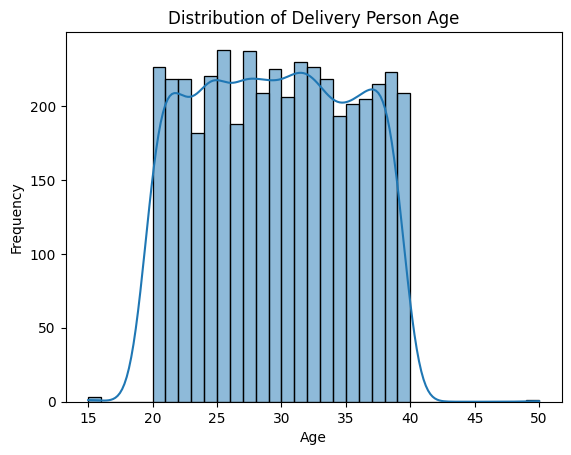

In [691]:
sns.histplot(df_clear["Delivery_person_Age"], kde=True, bins=range(int(df_clear["Delivery_person_Age"].min()), int(df_clear["Delivery_person_Age"].max()) + 1))
plt.title("Distribution of Delivery Person Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [692]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       4291 non-null   object        
 1   Delivery_person_ID       4291 non-null   object        
 2   Delivery_person_Age      4291 non-null   Int64         
 3   Delivery_person_Ratings  4291 non-null   float64       
 4   Time_Ordered             4291 non-null   datetime64[ns]
 5   Time_Order_picked        4291 non-null   datetime64[ns]
 6   Weatherconditions        4291 non-null   object        
 7   Road_traffic_density     4291 non-null   object        
 8   Vehicle_condition        4291 non-null   int64         
 9   Type_of_order            4291 non-null   object        
 10  Type_of_vehicle          4291 non-null   object        
 11  multiple_deliveries      4291 non-null   Int64         
 12  Festival      

In [693]:
df_clear.sample(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Ordered,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Restaurant_location,Delivery_location,Time_Order_delivered
1970,0xa528,RANCHIRES07DEL01,28,4.6,2022-03-06 23:40:00,2022-03-06 23:45:00,Sunny,Low,0,Snack,motorcycle,0,No,Metropolitan,"(23.359407, 85.325055)","(23.429407, 85.395055)",2022-03-07 00:07:00
3770,0x1500,SURRES18DEL01,20,4.1,2022-03-17 13:45:00,2022-03-17 14:00:00,Stormy,High,0,Meal,motorcycle,1,No,Metropolitan,"(21.149834, 72.778666)","(21.189834, 72.818666)",2022-03-17 14:33:00
4072,0x6838,JAPRES06DEL03,36,4.6,2022-03-30 17:20:00,2022-03-30 17:25:00,Windy,Medium,1,Buffet,scooter,1,No,Urban,"(26.911927, 75.797282)","(26.941927, 75.827282)",2022-03-30 17:51:00
514,0xe076,AGRRES02DEL03,38,4.1,2022-02-16 20:15:00,2022-02-16 20:25:00,Sandstorms,Jam,2,Snack,scooter,2,No,Metropolitan,"(0.0, 0.0)","(0.09, 0.09)",2022-02-16 21:03:00
1290,0x9f8d,HYDRES18DEL03,28,5.0,2022-03-01 21:40:00,2022-03-01 21:55:00,Windy,Jam,2,Buffet,motorcycle,0,No,Metropolitan,"(17.450851, 78.379347)","(17.510851, 78.439347)",2022-03-01 22:12:00
2137,0x8a65,INDORES18DEL02,21,5.0,2022-03-08 22:55:00,2022-03-08 23:05:00,Windy,Low,2,Buffet,motorcycle,1,No,Unknown,"(22.753839, 75.897429)","(22.833838, 75.977429)",2022-03-08 23:22:00
377,0x8b39,VADRES01DEL01,24,2.6,2022-04-06 22:35:00,2022-04-06 22:50:00,Sunny,Low,1,Drinks,motorcycle,1,Yes,Metropolitan,"(22.307898, 73.167788)","(22.417898, 73.277788)",2022-04-06 23:32:00
1835,0x878a,RANCHIRES010DEL02,36,4.5,2022-03-16 20:15:00,2022-03-16 20:25:00,Stormy,Jam,1,Snack,scooter,1,No,Metropolitan,"(23.354422, 85.3329)","(23.484422, 85.4629)",2022-03-16 20:58:00
102,0x6757,INDORES05DEL02,24,4.3,2022-03-15 08:45:00,2022-03-15 09:00:00,Sandstorms,Low,0,Meal,motorcycle,0,No,Urban,"(22.727021, 75.884167)","(22.747021, 75.904167)",2022-03-15 09:19:00
3310,0x9b26,JAPRES06DEL01,37,4.6,2022-03-10 17:40:00,2022-03-10 17:50:00,Sandstorms,Medium,1,Meal,scooter,1,No,Metropolitan,"(26.911927, 75.797282)","(26.981927, 75.867282)",2022-03-10 18:17:00
